In [589]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from scipy.stats import pearsonr
import math
import seaborn as sns
from scipy.stats import randint

In [590]:
teamname = "Arsenal"

matches = pd.read_csv("spi_matches.csv")
if(teamname == "all") :
    team_matches = matches
else :
    team_matches = matches[np.logical_or(matches['team1'] == teamname, matches['team2'] == teamname)]
team_matches_data = team_matches.loc[:, ['date', 'team1', 'team2', 'score1', 'score2', 'prob1', 'prob2', 'importance1', 'importance2', 'spi1', 'spi2']]

# Cleaning dataset and creating columns for team data 

In [591]:
for label, row in team_matches_data.iterrows() :
    print(str(row["date"]) + " : " + str(row["team1"]) + " " + str(row["score1"])[0] + "x"  + str(row["score2"])[0] + " " + str(row["team2"]))
    if(row['team1'] == teamname) :
        team_matches_data.loc[label, "goals_team"] = row['score1']
        team_matches_data.loc[label, "goals_adv"] = row['score2']
        team_matches_data.loc[label, "adv_team"] = row['team2']
        team_matches_data.loc[label, "place"] = "home"
        team_matches_data.loc[label, "prob_team"] = row['prob1']
        team_matches_data.loc[label, "spi_team"] = row['spi1']
        team_matches_data.loc[label, "spi_adv"] = row['spi2']
        team_matches_data.loc[label, "spi_dif"] = row['spi1'] - row['spi2']
        if(math.isnan(row['importance1'])) :
            team_matches_data.loc[label, "importance_team"] = 50.0
        else : 
            team_matches_data.loc[label, "importance_team"] = row['importance1']
        
        if(math.isnan(row['score1'])) :
            team_matches_data.loc[label, "goals_team"] = 0.0
            team_matches_data.loc[label, "goals_team_str"] = 0
        elif row['score1'] >= 3:
            team_matches_data.loc[label, "goals_team_str"] = 3
        else :
            team_matches_data.loc[label, "goals_team_str"] = int(row['score1'])
            
        if(math.isnan(row['score2'])) :
            team_matches_data.loc[label, "goals_away"] = 0.0
            team_matches_data.loc[label, "goals_away_str"] = 0
        elif row['score2'] >= 3:
            team_matches_data.loc[label, "goals_away_str"] = 3
        else :
            team_matches_data.loc[label, "goals_away_str"] = int(row['score2'])
            
    else :
        team_matches_data.loc[label, "goals_team"] = row['score2']
        team_matches_data.loc[label, "goals_adv"] = row['score1']
        team_matches_data.loc[label, "adv_team"] = row['team1']
        team_matches_data.loc[label, "place"] = "away"
        team_matches_data.loc[label, "prob_team"] = row['prob2']
        team_matches_data.loc[label, "spi_team"] = row['spi2']
        team_matches_data.loc[label, "spi_adv"] = row['spi1']
        team_matches_data.loc[label, "spi_dif"] = row['spi2'] - row['spi1']
        if(math.isnan(row['importance2'])) :
            team_matches_data.loc[label, "importance_team"] = 50.0
        else :
            team_matches_data.loc[label, "importance_team"] = row['importance2']
            
        if(math.isnan(row['score1'])) :
            team_matches_data.loc[label, "goals_away"] = 0.0
            team_matches_data.loc[label, "goals_away_str"] = 0
        elif row['score1'] >= 3:
            team_matches_data.loc[label, "goals_away_str"] = 3
        else :
            team_matches_data.loc[label, "goals_away_str"] = int(row['score1'])
            
        if(math.isnan(row['score1'])) :
            team_matches_data.loc[label, "goals_team"] = 0.0
            team_matches_data.loc[label, "goals_team_str"] = 0
        elif row['score2'] >= 3:
            team_matches_data.loc[label, "goals_team_str"] = 3
        else :
            team_matches_data.loc[label, "goals_team_str"] = int(row['score2'])

2016-08-14 : Arsenal 3x4 Liverpool
2016-08-20 : Leicester City 0x0 Arsenal
2016-08-27 : Watford 1x3 Arsenal
2016-09-10 : Arsenal 2x1 Southampton
2016-09-13 : Paris Saint-Germain 1x1 Arsenal
2016-09-17 : Hull City 1x4 Arsenal
2016-09-24 : Arsenal 3x0 Chelsea
2016-09-28 : Arsenal 2x0 Basel
2016-10-02 : Burnley 0x1 Arsenal
2016-10-15 : Arsenal 3x2 Swansea City
2016-10-19 : Arsenal 6x0 Ludogorets
2016-10-22 : Arsenal 0x0 Middlesbrough
2016-10-29 : Sunderland 1x4 Arsenal
2016-11-01 : Ludogorets 2x3 Arsenal
2016-11-06 : Arsenal 1x1 Tottenham Hotspur
2016-11-19 : Manchester United 1x1 Arsenal
2016-11-23 : Arsenal 2x2 Paris Saint-Germain
2016-11-27 : Arsenal 3x1 AFC Bournemouth
2016-12-03 : West Ham United 1x5 Arsenal
2016-12-06 : Basel 1x4 Arsenal
2016-12-10 : Arsenal 3x1 Stoke City
2016-12-13 : Everton 2x1 Arsenal
2016-12-18 : Manchester City 2x1 Arsenal
2016-12-26 : Arsenal 1x0 West Bromwich Albion
2017-01-01 : Arsenal 2x0 Crystal Palace
2017-01-03 : AFC Bournemouth 3x3 Arsenal
2017-01-14 :

# Creating data visualizations

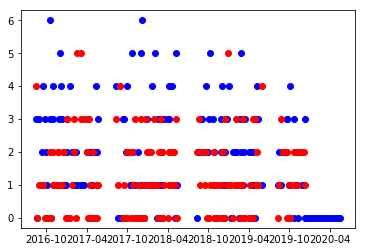

<Figure size 432x288 with 0 Axes>

In [592]:
team_matches_data.loc[:, "datetimeobj"] = team_matches_data.loc[:, "date"].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))

plt.plot_date(x=team_matches_data.loc[:, 'datetimeobj'], y=team_matches_data.loc[:,'goals_team'], xdate = True, ydate = False, color = 'blue')
plt.plot_date(x=team_matches_data.loc[:, 'datetimeobj'], y=team_matches_data.loc[:,'goals_adv'], xdate = True, ydate = False, color = 'red')
plt.show()
plt.clf()

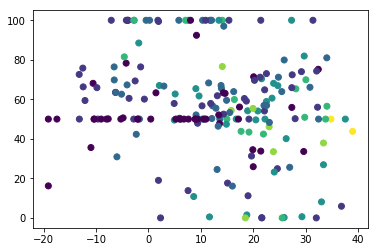

<Figure size 432x288 with 0 Axes>

In [593]:
xs=team_matches_data['spi_dif']
ys=team_matches_data['importance_team']
color=team_matches_data['goals_team']
plt.scatter(xs, ys, c=color)
plt.show()
plt.clf()

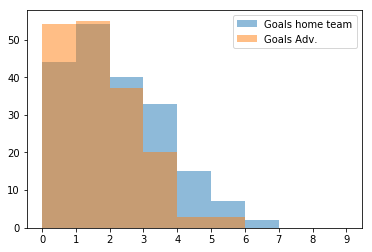

<Figure size 432x288 with 0 Axes>

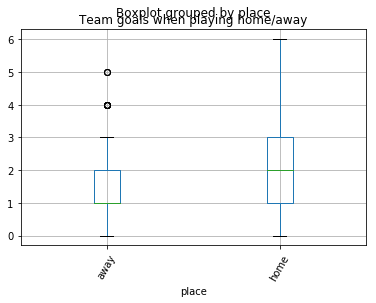

<Figure size 432x288 with 0 Axes>

In [594]:
plt.hist(team_matches_data['goals_team'], bins = range(10), alpha=0.5, label='Goals home team')
plt.hist(team_matches_data['goals_adv'], bins = range(10), alpha=0.5, label='Goals Adv.')
plt.legend(loc='upper right')
plt.xticks(range(10))
plt.show()
plt.clf()

team_done_matches = team_matches_data[team_matches_data['datetimeobj'] < datetime.datetime.now() - datetime.timedelta(days=1)]
team_predict = team_done_matches[['goals_team_str','prob_team', 'importance_team', 'spi_dif', 'place']]
team_predict = pd.get_dummies(team_predict, drop_first = True)

team_done_matches.boxplot('goals_team', 'place', rot=60)
plt.title("Team goals when playing home/away")
plt.xticks([1, 2], ['away', 'home'])
plt.show()
plt.clf()

# Studying data correlations

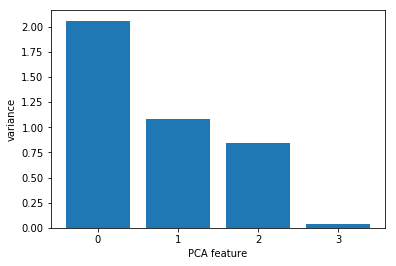

<Figure size 432x288 with 0 Axes>

In [595]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(team_predict.drop('goals_team_str', axis=1).values)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
plt.clf()

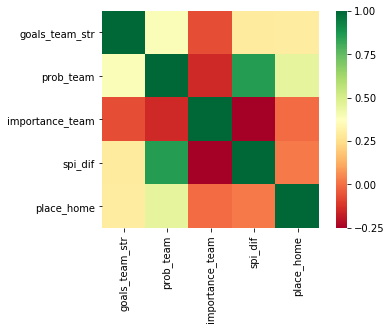

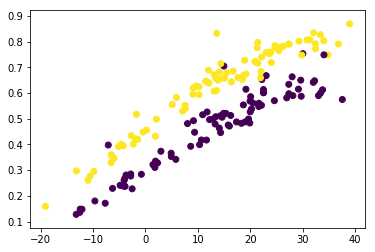

0.8553256525722285


<Figure size 432x288 with 0 Axes>

In [596]:
ax = sns.heatmap(team_predict.corr(), square=True, cmap='RdYlGn')
plt.show()
plt.clf()

plt.scatter(team_predict['spi_dif'], team_predict['prob_team'], c=team_predict['place_home'])
plt.show()
plt.clf()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(team_predict['spi_dif'], team_predict['prob_team'])

# Display the correlation
print(correlation)

# Training kNeighbors to predict goal numbers

{'n_neighbors': 46}
0.42528735632183906
Predicted scores = 
[1. 1. 1. 3. 2. 3. 1. 1. 1. 3. 3. 1. 3. 1. 1. 3. 3. 1. 3. 3. 3. 1. 1. 1.
 1. 1. 1. 3. 3. 1. 3. 1. 3. 3. 1.]


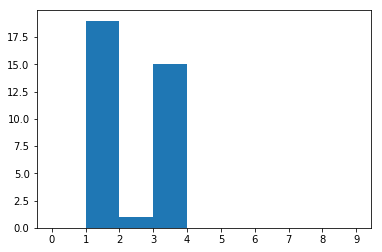


Precision of model = 
0.45714285714285713

Confusion Matrix: 
[[0 0 0 0]
 [3 9 5 2]
 [0 0 1 0]
 [1 2 6 6]]

Classification: 
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         0
        1.0       0.82      0.47      0.60        19
        2.0       0.08      1.00      0.15         1
        3.0       0.75      0.40      0.52        15

avg / total       0.77      0.46      0.55        35

Model predicted 1 goal(s) against Liverpool away -- Real result = 2 [0=0.239, 1=0.37, 2=0.152, 3+=0.239]

Result predicted correctly! 1 goal(s) against Leicester City home -- [0=0.217, 1=0.326, 2=0.196, 3+=0.261]

Model predicted 1 goal(s) against Watford home -- Real result = 3+ [0=0.217, 1=0.326, 2=0.152, 3+=0.304]

Model predicted 3+ goal(s) against Southampton away -- Real result = 2 [0=0.043, 1=0.174, 2=0.283, 3+=0.5]

Result predicted correctly! 2 goal(s) against Paris Saint-Germain home -- [0=0.109, 1=0.283, 2=0.304, 3+=0.304]

Model predic

C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


<Figure size 432x288 with 0 Axes>

In [597]:
X = team_predict.drop('goals_team_str', axis=1).values
y = team_predict['goals_team_str'].values

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

#Discovering best parameter for k_neighbors
param_grid={'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 5)

knn_cv.fit(X, y)

print(knn_cv.best_params_)
print(knn_cv.best_score_)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
knn.fit(X_train,y_train)
print("Predicted scores = ") 
print(knn.predict(X_test))
plt.hist(knn.predict(X_test), bins = range(10), alpha=1, label='Number of goals')
plt.xticks(range(10))
plt.show()
plt.clf()
print("\nPrecision of model = ") 
print(knn.score(X_test, y_test))
print("\nConfusion Matrix: ")
print(confusion_matrix(knn.predict(X_test), y_test))
print("\nClassification: ")
print(classification_report(knn.predict(X_test), y_test))

KNN_score = knn.score(X_test, y_test)

y_pred = knn.predict(X_test)
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)

adv_teams = team_done_matches['adv_team'].values

for i in range(y_pred_prob.shape[0]) :
    if y_pred[i] != y_test[i]:
        print("Model predicted " + (str(int(y_pred[i])) if y_pred[i]<3 else "3+")  + " goal(s) against " + adv_teams[i] + " "  + home[i] + " -- Real result = " + (str(int(y_test[i])) if y_test[i]<3 else "3+") + " [0=" + str(round(y_pred_prob[i][0], 3)) + ", 1=" + str(round(y_pred_prob[i][1], 3)) + ", 2=" + str(round(y_pred_prob[i][2], 3)) + ", 3+=" + str(round(y_pred_prob[i][3], 3)) + "]" + "\n") 
    else :
        print("Result predicted correctly! " + (str(int(y_pred[i])) if y_pred[i]<3 else "3+") + " goal(s) against " + adv_teams[i] + " "  + home[i] + " -- "+ "[0=" + str(round(y_pred_prob[i][0], 3)) + ", 1=" + str(round(y_pred_prob[i][1], 3)) + ", 2=" + str(round(y_pred_prob[i][2], 3)) + ", 3+=" + str(round(y_pred_prob[i][3], 3)) + "]" + "\n") 

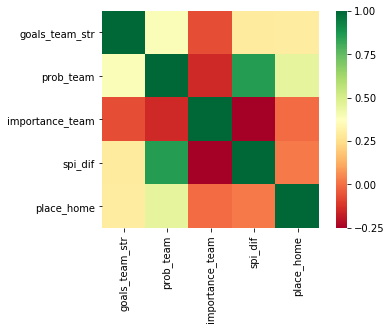

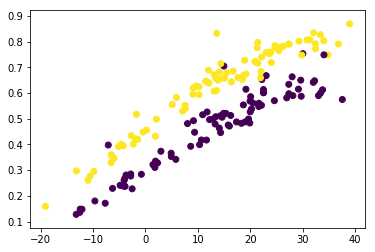

0.8553256525722285


<Figure size 432x288 with 0 Axes>

In [598]:
ax = sns.heatmap(team_predict.corr(), square=True, cmap='RdYlGn')
plt.show()
plt.clf()

plt.scatter(team_predict['spi_dif'], team_predict['prob_team'], c=team_predict['place_home'])
plt.show()
plt.clf()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(team_predict['spi_dif'], team_predict['prob_team'])

# Display the correlation
print(correlation)

# Trying linear regression to predict goals

With one variable (prob_team first and spi_dif after)

0.15156486173097572


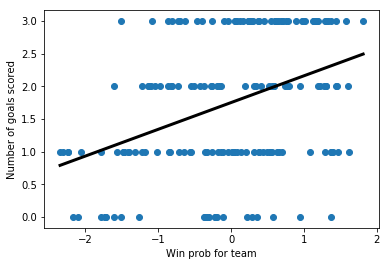

R^2: 0.3622811627839988
Root Mean Squared Error: 0.7581080620223195
[0.16210023 0.10352604 0.22084464 0.07936397 0.03276713]


<Figure size 432x288 with 0 Axes>

In [599]:
reg = LinearRegression()

X = team_predict['prob_team'].values.reshape(-1,1)
y = team_predict['goals_team_str'].values.reshape(-1,1)

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)
reg.fit(X, y)
result = reg.predict(prediction_space)
print(reg.score(X,y))

LinRegProb_score = reg.score(X,y)

# Plot regression line
plt.scatter(X,y)
plt.plot(prediction_space, result, color='black', linewidth=3)
plt.xlabel("Win prob for team")
plt.ylabel("Number of goals scored")
plt.show()
plt.clf()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

cv_scores = cross_val_score(reg, X, y, cv=5)
print(cv_scores)

0.08454670825123689


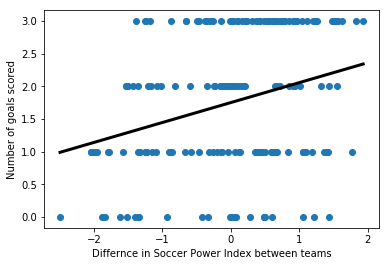

R^2: 0.21839037144391882
Root Mean Squared Error: 0.8392888291375215
[ 0.12186657 -0.00477944  0.09356833  0.02727086  0.04370935]


<Figure size 432x288 with 0 Axes>

In [600]:
reg2 = LinearRegression()

X = team_predict['spi_dif'].values.reshape(-1,1)
y = team_predict['goals_team_str'].values.reshape(-1,1)

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)
reg2.fit(X, y)
result = reg2.predict(prediction_space)
print(reg2.score(X,y))

LinRegDif_score = reg2.score(X,y)

# Plot regression line
plt.scatter(X,y)
plt.plot(prediction_space, result, color='black', linewidth=3)
plt.xlabel("Differnce in Soccer Power Index between teams")
plt.ylabel("Number of goals scored")
plt.show()
plt.clf()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print("R^2: {}".format(reg2.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

cv_scores = cross_val_score(reg, X, y, cv=5)
print(cv_scores)

Trying with all variables


Predictions

[1.38600759 1.33175692 1.53725339 2.23667967 1.82236722 2.05378413
 1.35840122 1.23507037 1.68701041 1.79457139 2.06957027 0.89747665
 1.96240249 1.01514455 0.94296903 2.30609587 2.02241878 1.59538909
 2.29072927 1.69800589 2.0711519  1.03825677 0.89527897 1.12989539
 1.54538108 1.6815763  1.44591801 1.26982131 1.69465586 1.07884144
 2.54800978 1.52957476 1.79891331 2.61344403 1.17917494]

Score

0.24168002416498557

Coeficients

[-0.13241387  0.02051925  0.38246871  0.38574571]
1.7400172302627983


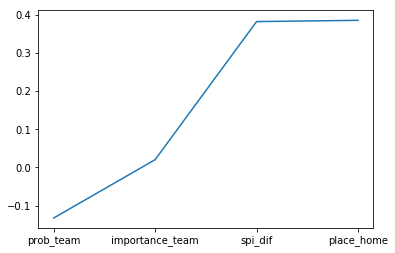

<Figure size 432x288 with 0 Axes>

In [601]:
reg_all = LinearRegression()

X = team_predict.drop('goals_team_str', axis=1).values
y = team_predict['goals_team_str'].values

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

print("\nPredictions\n")
print(y_pred)
print("\nScore\n")
print(reg_all.score(X_test, y_test))
print("\nCoeficients\n")
print(reg_all.coef_)
print(reg_all.intercept_)

plt.plot(team_predict.drop('goals_team_str', axis = 1).columns, reg_all.coef_)
plt.show()
plt.clf()

LinReg_score = reg_all.score(X_test, y_test)

# Logistic regression

In [602]:
X = team_predict.drop('goals_team_str', axis=1).values
y = team_predict['goals_team_str'].values

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

#Choosing best parameter for model
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}
reg_log = LogisticRegression()
reg_log_cv = GridSearchCV(reg_log, param_grid, cv=5)
reg_log_cv.fit(X, y)

print("Melhor score com parametro = " + str(reg_log_cv.best_score_))
print(reg_log_cv.best_params_)

reg_log = LogisticRegression(C = reg_log_cv.best_params_['C'], penalty = reg_log_cv.best_params_['penalty'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

print("\nPredictions\n")
print(y_pred)
print("\nPrecision of model = ") 
print(reg_log.score(X_test, y_test))
print("\nConfusion Matrix: ")
print(confusion_matrix(reg_log.predict(X_test), y_test))
print("\nClassification: ")
print(classification_report(reg_log.predict(X_test), y_test))

LogReg_score = reg_log.score(X_test, y_test)

y_pred = reg_log.predict(X_test)
# Compute predicted probabilities: y_pred_prob
y_pred_prob = reg_log.predict_proba(X_test)

adv_teams = team_done_matches['adv_team'].values

for i in range(y_pred_prob.shape[0]) :
    if y_pred[i] != y_test[i]:
        print("Model predicted " + (str(int(y_pred[i])) if y_pred[i]<3 else "3+")  + " goal(s) against " + adv_teams[i] + " "  + home[i] + " -- Real result = " + (str(int(y_test[i])) if y_test[i]<3 else "3+") + " [0=" + str(round(y_pred_prob[i][0], 3)) + ", 1=" + str(round(y_pred_prob[i][1], 3)) + ", 2=" + str(round(y_pred_prob[i][2], 3)) + ", 3+=" + str(round(y_pred_prob[i][3], 3)) + "]" + "\n") 
    else :
        print("Result predicted correctly! " + (str(int(y_pred[i])) if y_pred[i]<3 else "3+") + " goal(s) against " + adv_teams[i] + " "  + home[i] + " -- "+ "[0=" + str(round(y_pred_prob[i][0], 3)) + ", 1=" + str(round(y_pred_prob[i][1], 3)) + ", 2=" + str(round(y_pred_prob[i][2], 3)) + ", 3+=" + str(round(y_pred_prob[i][3], 3)) + "]" + "\n") 

Melhor score com parametro = 0.4540229885057471
{'C': 1e-05, 'penalty': 'l2'}

Predictions

[1. 1. 1. 3. 2. 3. 1. 1. 1. 1. 3. 1. 3. 1. 1. 3. 3. 1. 3. 1. 3. 1. 1. 1.
 1. 1. 1. 3. 3. 1. 3. 3. 3. 3. 1.]

Precision of model = 
0.5142857142857142

Confusion Matrix: 
[[ 0  0  0  0]
 [ 3 10  6  1]
 [ 0  0  1  0]
 [ 1  1  5  7]]

Classification: 
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         0
        1.0       0.91      0.50      0.65        20
        2.0       0.08      1.00      0.15         1
        3.0       0.88      0.50      0.64        14

avg / total       0.87      0.51      0.63        35

Model predicted 1 goal(s) against Liverpool away -- Real result = 2 [0=0.25, 1=0.25, 2=0.25, 3+=0.25]

Result predicted correctly! 1 goal(s) against Leicester City home -- [0=0.25, 1=0.25, 2=0.25, 3+=0.25]

Model predicted 1 goal(s) against Watford home -- Real result = 3+ [0=0.25, 1=0.25, 2=0.25, 3+=0.25]

Model predicted 3+ goal(s) ag

C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Decision tree model

In [603]:
X = team_predict.drop('goals_team_str', axis=1).values
y = team_predict['goals_team_str'].values

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

#Finding best parameters for Decision tree
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 5),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

tree = DecisionTreeClassifier(criterion = tree_cv.best_params_['criterion'], max_depth = tree_cv.best_params_['max_depth'], max_features = tree_cv.best_params_['max_features'], min_samples_leaf = tree_cv.best_params_['min_samples_leaf'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("\nPredictions\n")
print(y_pred)
print("\nPrecision of model = ") 
print(tree.score(X_test, y_test))
print("\nConfusion Matrix: ")
print(confusion_matrix(tree.predict(X_test), y_test))
print("\nClassification: ")
print(classification_report(tree.predict(X_test), y_test))

Tree_score = tree.score(X_test, y_test)

# Compute predicted probabilities: y_pred_prob
y_pred_prob = tree.predict_proba(X_test)

adv_teams = team_done_matches['adv_team'].values
home = team_done_matches['place'].values

for i in range(y_pred_prob.shape[0]) :
    if y_pred[i] != y_test[i]:
        print("Model predicted " + (str(int(y_pred[i])) if y_pred[i]<3 else "3+")  + " goal(s) against " + adv_teams[i] + " "  + home[i] + " -- Real result = " + (str(int(y_test[i])) if y_test[i]<3 else "3+") + " [0=" + str(round(y_pred_prob[i][0], 3)) + ", 1=" + str(round(y_pred_prob[i][1], 3)) + ", 2=" + str(round(y_pred_prob[i][2], 3)) + ", 3+=" + str(round(y_pred_prob[i][3], 3)) + "]" + "\n") 
    else :
        print("Result predicted correctly! " + (str(int(y_pred[i])) if y_pred[i]<3 else "3+") + " goal(s) against " + adv_teams[i] + " "  + home[i] + " -- "+ "[0=" + str(round(y_pred_prob[i][0], 3)) + ", 1=" + str(round(y_pred_prob[i][1], 3)) + ", 2=" + str(round(y_pred_prob[i][2], 3)) + ", 3+=" + str(round(y_pred_prob[i][3], 3)) + "]" + "\n") 

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 8}
Best score is 0.3850574712643678

Predictions

[2. 3. 3. 3. 3. 2. 3. 3. 3. 3. 2. 0. 3. 0. 0. 3. 2. 1. 3. 3. 2. 0. 0. 0.
 1. 3. 2. 2. 3. 0. 3. 3. 3. 3. 3.]

Precision of model = 
0.37142857142857144

Confusion Matrix: 
[[ 3  4  0  0]
 [ 0  2  0  0]
 [ 1  2  2  2]
 [ 0  3 10  6]]

Classification: 
             precision    recall  f1-score   support

        0.0       0.75      0.43      0.55         7
        1.0       0.18      1.00      0.31         2
        2.0       0.17      0.29      0.21         7
        3.0       0.75      0.32      0.44        19

avg / total       0.60      0.37      0.41        35

Result predicted correctly! 2 goal(s) against Liverpool home -- [0=0.143, 1=0.095, 2=0.571, 3+=0.19]

Model predicted 3+ goal(s) against Leicester City away -- Real result = 1 [0=0.067, 1=0.3, 2=0.233, 3+=0.4]

Result predicted correctly! 3+ goal(s) against Watford away

# Ridge model

In [604]:
X = team_predict.drop('goals_team_str', axis=1).values
y = team_predict['goals_team_str'].values

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

# Setup the parameters and distributions to sample from: param_dist
linear_space = np.linspace(0, 1)

param_dist = {"alpha": linear_space}

ridge_reg = Ridge()

ridge_reg_cv = GridSearchCV(ridge_reg, param_dist, cv=5)

ridge_reg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(ridge_reg_cv.best_params_))
print("Best score is {}".format(ridge_reg_cv.best_score_))

ridge_reg = Ridge(alpha = ridge_reg_cv.best_params_['alpha'], normalize = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

print("\nPredictions\n")
print(y_pred)
print("\nReal Results\n")
print(y_test)
print("\nPrecision of model = ") 
print(ridge_reg.score(X_test, y_test))

print("\nR^2: {}".format(ridge_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Ridge_score = ridge_reg.score(X_test, y_test)

Tuned Decision Tree Parameters: {'alpha': 1.0}
Best score is 0.10685623573492052

Predictions

[1.57373626 1.56041333 1.67163412 2.09178243 1.71776162 1.98826885
 1.51462204 1.4413043  1.63424762 1.70248334 1.93431925 1.1852516
 1.88926757 1.27858593 1.23065436 2.13097148 1.96682028 1.67383266
 2.10566043 1.66722413 1.94329672 1.30076436 1.16447388 1.29827571
 1.63252128 1.64469449 1.5554565  1.73232622 1.77693804 1.29093787
 2.17613749 1.75938599 1.87728042 2.26623771 1.43049853]

Real Results

[2. 1. 3. 2. 2. 2. 2. 1. 2. 1. 0. 1. 3. 0. 1. 3. 1. 1. 2. 2. 3. 0. 1. 1.
 1. 2. 1. 3. 2. 0. 2. 3. 3. 3. 2.]

Precision of model = 
0.2662107011202409

R^2: 0.2662107011202409
Root Mean Squared Error: 0.8132090054227238


# Lasso model

In [605]:
X = team_predict.drop('goals_team_str', axis=1).values
y = team_predict['goals_team_str'].values

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

# Setup the parameters and distributions to sample from: param_dist
linear_space = np.linspace(0, 1)

param_dist = {"alpha": linear_space}

lasso_reg = Lasso()

lasso_reg_cv = GridSearchCV(lasso_reg, param_dist, cv=5)

lasso_reg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(lasso_reg_cv.best_params_))
print("Best score is {}".format(lasso_reg_cv.best_score_))

lasso_reg = Lasso(alpha = lasso_reg_cv.best_params_['alpha'], normalize = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)

print("\nPredictions\n")
print(y_pred)
print("\nReal results\n")
print(y_test)
print("\nPrecision of model = ") 
print(lasso_reg.score(X_test, y_test))

print("\nR^2: {}".format(lasso_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Lasso_score = lasso_reg.score(X_test, y_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_pa

Tuned Decision Tree Parameters: {'alpha': 0.061224489795918366}
Best score is 0.1180415146779689

Predictions

[1.76978417 1.76978417 1.76978417 1.76978417 1.76978417 1.76978417
 1.76978417 1.76978417 1.76978417 1.76978417 1.76978417 1.76978417
 1.76978417 1.76978417 1.76978417 1.76978417 1.76978417 1.76978417
 1.76978417 1.76978417 1.76978417 1.76978417 1.76978417 1.76978417
 1.76978417 1.76978417 1.76978417 1.76978417 1.76978417 1.76978417
 1.76978417 1.76978417 1.76978417 1.76978417 1.76978417]

Real results

[2. 1. 3. 2. 2. 2. 2. 1. 2. 1. 0. 1. 3. 0. 1. 3. 1. 1. 2. 2. 3. 0. 1. 1.
 1. 2. 1. 3. 2. 0. 2. 3. 3. 3. 2.]

Precision of model = 
-0.00784238108418478

R^2: -0.00784238108418478
Root Mean Squared Error: 0.953043669349573


# Suport vector machine model

In [606]:
X = team_predict.drop('goals_team_str', axis=1).values
y = team_predict['goals_team_str'].values

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

#Choosing best parameter for model
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
reg_svc = SVC()
reg_svc_cv = GridSearchCV(reg_svc, param_grid, cv=5)
reg_svc_cv.fit(X, y)

print("Melhor score com parametro = " + str(reg_svc_cv.best_score_))
print(reg_svc_cv.best_params_)

reg_svc = SVC(C = reg_svc_cv.best_params_['C'], probability = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
reg_svc.fit(X_train, y_train)
y_pred = reg_svc.predict(X_test)

print("\nPredictions\n")
print(y_pred)
print("\nPrecision of model = ") 
print(reg_svc.score(X_test, y_test))
print("\nConfusion Matrix: ")
print(confusion_matrix(reg_svc.predict(X_test), y_test))
print("\nClassification: ")
print(classification_report(reg_svc.predict(X_test), y_test))

SVM_score = reg_svc.score(X_test, y_test)

# Compute predicted probabilities: y_pred_prob
y_pred_prob = reg_svc.predict_proba(X_test)

adv_teams = team_done_matches['adv_team'].values

for i in range(y_pred_prob.shape[0]) :
    if y_pred[i] != y_test[i]:
        print("Model predicted " + (str(int(y_pred[i])) if y_pred[i]<3 else "3+")  + " goal(s) against " + adv_teams[i] + " "  + home[i] + " -- Real result = " + (str(int(y_test[i])) if y_test[i]<3 else "3+") + " [0=" + str(round(y_pred_prob[i][0], 3)) + ", 1=" + str(round(y_pred_prob[i][1], 3)) + ", 2=" + str(round(y_pred_prob[i][2], 3)) + ", 3+=" + str(round(y_pred_prob[i][3], 3)) + "]" + "\n") 
    else :
        print("Result predicted correctly! " + (str(int(y_pred[i])) if y_pred[i]<3 else "3+") + " goal(s) against " + adv_teams[i] + " "  + home[i] + " -- "+ "[0=" + str(round(y_pred_prob[i][0], 3)) + ", 1=" + str(round(y_pred_prob[i][1], 3)) + ", 2=" + str(round(y_pred_prob[i][2], 3)) + ", 3+=" + str(round(y_pred_prob[i][3], 3)) + "]" + "\n") 

Melhor score com parametro = 0.3735632183908046
{'C': 0.4393970560760795}

Predictions

[1. 1. 1. 3. 3. 3. 1. 1. 3. 3. 3. 1. 3. 1. 1. 3. 3. 1. 3. 3. 3. 1. 1. 1.
 1. 1. 1. 1. 3. 1. 3. 1. 3. 3. 1.]

Precision of model = 
0.4

Confusion Matrix: 
[[0 0 0 0]
 [3 9 4 3]
 [0 0 0 0]
 [1 2 8 5]]

Classification: 
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00         0
        1.0       0.82      0.47      0.60        19
        2.0       0.00      0.00      0.00         0
        3.0       0.62      0.31      0.42        16

avg / total       0.73      0.40      0.52        35

Model predicted 1 goal(s) against Liverpool home -- Real result = 2 [0=0.158, 1=0.418, 2=0.169, 3+=0.255]

Result predicted correctly! 1 goal(s) against Leicester City away -- [0=0.181, 1=0.4, 2=0.171, 3+=0.248]

Model predicted 1 goal(s) against Watford away -- Real result = 3+ [0=0.147, 1=0.382, 2=0.177, 3+=0.293]

Model predicted 3+ goal(s) against Southampton home --

C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [607]:
array_scores = {'SVM_score': SVM_score, 'Ridge_score': Ridge_score, 'Lasso_score': Lasso_score, 'LogReg_score': LogReg_score, 'Tree_score': Tree_score, 'LinRegDif_score': LinRegDif_score, 'LinRegProb_score': LinRegProb_score, 'LinReg_score': LinReg_score, 'KNN_score': KNN_score}
ordered_scores = {k: v for k, v in sorted(array_scores.items(), key=lambda item: item[1])}
for index, value in ordered_scores.items():
    print(index + ": " + str(value))

Lasso_score: -0.00784238108418478
LinRegDif_score: 0.08454670825123689
LinRegProb_score: 0.15156486173097572
LinReg_score: 0.24168002416498557
Ridge_score: 0.2662107011202409
Tree_score: 0.37142857142857144
SVM_score: 0.4
KNN_score: 0.45714285714285713
LogReg_score: 0.5142857142857142
